# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [8]:
import sys
import os
sys.path.append("code")

from collections import deque
from unityagents import UnityEnvironment
import numpy as np
import random as random
import torch
from LinearNet import Actor,Critic
from DDPGAgent import DDPGAgent
from MADDPGAgent import MADDPGAgent
from MADDPGAgent2 import MADDPGAgent2
from MADDPGAgent3 import MADDPGAgent3
from DDPGAgent import ReplayBuffer
from HyperParam import HyperParam

from DecayingValue import ExponentialDecay, SpacedRepetitionDecay, PositiveMemoriesFactorExplorationDecay, DecayingValue

import matplotlib.pyplot as plt

In [9]:
SEED = 0

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED);

np.set_printoptions(precision=3)

In [10]:
scores_episode = []
hist_neg = []
hist_pos = []
hist_total = []
hist_exp = []
hist_score_sum = [0]
max_action = []
min_action = []
max_internal = []
min_internal = []
episode_length = []
episode_actions = { 'A1x': [], 'A1y': [], 'A2x': [], 'A2y': [], 'internalx': [], 'internaly': [] }

def reset_hist():
    scores_episode.clear()
    hist_neg.clear()
    hist_pos.clear()
    hist_total.clear()
    hist_exp.clear()
    episode_actions = { 'A1x': [], 'A1y': [], 'A2x': [], 'A2y': [], 'internalx': [], 'internaly': [] }
    
    max_internal.clear()
    min_internal.clear()
    min_action.clear()
    max_action.clear()
    episode_length.clear()
    
    hist_score_sum.clear()
    hist_score_sum.append(0)

In [12]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


def plot_score_sum(hist_score_sum, title=""):
    fig = plt.figure(figsize=(16, 6))
    plt.title(title)
    plt.plot(np.arange(len(hist_score_sum)), hist_score_sum, label='Cumulative score')
    plt.legend()
    plt.show()
    
def plot_loss(agent):
    fig = plt.figure(figsize=(16, 6))
    
    ax = fig.add_subplot(121)
    l1 = min(2000, len(agent.critic_loss))
    l1a = agent.critic_loss[-l1:]
    l1a = agent.critic_loss
    plt.plot(np.arange(len(l1a)), l1a, label="Critic loss")
    ma = moving_average(l1a, 100)
    plt.plot(np.arange(len(ma)), ma, label="Critic loss MA(100)", c='r')
    plt.axhline(y=0.0, color='r', linestyle='dashed', label="0 loss")
    plt.ylabel('Loss')
    plt.xlabel('Step')
    plt.legend()
    
    ax = fig.add_subplot(122)
    l2 = min(2000, len(agent.actor_loss))
    l2a = agent.actor_loss[-l2:]
    l2a = agent.actor_loss
    plt.plot(np.arange(len(l2a)), l2a, label="Actor loss")
    ma = moving_average(l2a, 100)
    plt.plot(np.arange(len(ma)), ma, label="Actor loss MA(100)", c='r')
    plt.axhline(y=0.0, color='r', linestyle='dashed', label="0 loss")
    plt.ylabel('Loss')
    plt.xlabel('Step')
    plt.legend()
    plt.show()
    
    
    ma = 100
    avg = moving_average(scores_episode, ma)
    avg = np.concatenate((np.zeros(ma), avg))
    
    fig, ax1 = plt.subplots(figsize=(16, 3))
    ax1.plot(np.arange(len(scores_episode)), scores_episode, label='Episode score')
    ax1.plot(np.arange(len(avg)), avg, c='r', label='{} MA'.format(ma))
    ax1.axhline(y=0.5, color='r', linestyle='dashed', label="Env solved treshold")
    ax1.legend()
    ax1.set_ylabel('Score')
    ax1.set_xlabel('Episode')
    
    ax2 = ax1.twinx()
    ax2.set_ylim(0, 1)
    ax2.plot(hist_exp, label="Exploration Factor", c='g')
    ax2.set_ylabel('Exploration factor')
    ax2.legend()
    
    plt.show()
    
    
    fig, ax1 = plt.subplots(figsize=(16, 16))
    ax = fig.add_subplot(211)
    plt.plot(max_action, label="Max", c='b')
    plt.plot(min_action, label="Min", c='b')
    result = (np.array(max_action) + np.array(min_action)) / 2
    plt.plot(result, label="Avg", c = 'r')
    plt.title("Action range")
    
    ax = fig.add_subplot(212)
    plt.plot(episode_actions['A1x'], label="A1(x)", c='r')
    plt.plot(episode_actions['A1y'], label="A1(y)", c='g')
    plt.plot(episode_actions['A2x'], label="A2(x)", c='b')
    plt.plot(episode_actions['A2y'], label="A2(y)", c='y')
    plt.ylim(-1, 1)
    plt.title("Episode actions")
    
    fig = plt.figure(figsize=(16, 4))
    plt.plot(episode_actions['internalx'], label="A1i(x)", c='b')
    plt.plot(episode_actions['internaly'], label="A1i(y)", c='g')
    plt.axhline(y=3, color='r', linestyle='dashed', label="tanh(3)=.995")
    plt.axhline(y=-3, color='r', linestyle='dashed', label="tanh(-3)=-.995")
    ax.axhline(y=5, color='r', linestyle='dashed', label="tanh(5)=.9999")
    ax.axhline(y=-5, color='r', linestyle='dashed', label="tanh(-5)=-.9999")
    plt.title("Episode internal actor output")
    plt.legend()
    plt.show()
    
    fig, ax1 = plt.subplots(figsize=(16, 12))
    ax = fig.add_subplot(211)
    ax.plot(max_internal, label="Max", c='g')
    ax.plot(min_internal, label="Min", c='b')
    ax.axhline(y=0.0, color='r', linestyle='dashed', label="0.0")
    ax.axhline(y=3, color='r', linestyle='dashed', label="tanh(3)=.995")
    ax.axhline(y=-3, color='r', linestyle='dashed', label="tanh(-3)=-.995")
    ax.axhline(y=5, color='r', linestyle='dashed', label="tanh(5)=.9999")
    ax.axhline(y=-5, color='r', linestyle='dashed', label="tanh(-5)=-.9999")
    ax.set_title("Episode internal actor output range")
    ax.legend()
    
    ax = fig.add_subplot(212)
    if len(max_internal) > 500:
        ax.plot(max_internal[-500:], label="Max", c='g')
        ax.plot(min_internal[-500:], label="Min", c='b')
    ax.axhline(y=0.0, color='r', linestyle='dashed', label="0.0")
    ax.axhline(y=3, color='r', linestyle='dashed', label="tanh(3)=.995")
    ax.axhline(y=-3, color='r', linestyle='dashed', label="tanh(-3)=-.995")
    ax.axhline(y=5, color='r', linestyle='dashed', label="tanh(5)=.9999")
    ax.axhline(y=-5, color='r', linestyle='dashed', label="tanh(-5)=-.9999")
    ax.set_title("Episode internal actor output range")
    
    fig = plt.figure(figsize=(16, 4))
    plt.plot(episode_length, label="length", c='b')
    plt.title("Episode length")
    plt.legend()
    
    plt.show()
    
    
    
def plot_run(agent):
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(131)
    plt.plot(hist_pos, label="Memory positive")
    plt.xlabel('Episode')
    plt.legend()

    ax = fig.add_subplot(132)
    plt.plot(hist_neg, label="Memory negative")
    plt.xlabel('Episode')
    plt.legend()

    ax = fig.add_subplot(133)
    plt.plot(hist_total, label="Memory total")
    plt.xlabel('Episode')
    plt.legend()
    plt.show()

    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(411)
    plt.plot(hist_pos, label="Memory positive")
    plt.ylabel('Positive memories count')
    plt.xlabel('Episode')
    plt.legend()

    ax = fig.add_subplot(412)
    ax.set_ylim(0, 1)
    plt.plot(hist_exp, label="Exploration Factor")
    plt.ylabel('Exploration factor')
    plt.xlabel('Episode')
    plt.legend()
    
    ma = 100
    avg = moving_average(scores_episode, ma)
    avg = np.concatenate((np.zeros(ma), avg))

    ax = fig.add_subplot(413)
    plt.plot(np.arange(len(scores_episode)), scores_episode, label='Episode score')
    plt.plot(np.arange(len(avg)), avg, c='r', label='{} MA'.format(ma))
    plt.axhline(y=0.5, color='r', linestyle='dashed', label="Env solved treshold")
    plt.legend()
    plt.ylabel('Score')
    plt.xlabel('Episode')

    ax = fig.add_subplot(414)
    plt.plot(np.arange(len(hist_score_sum)), hist_score_sum, label='Cumulative score')
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.legend()
    plt.show()
    
    plot_loss(agent)
    
    
    
    

In [35]:
def ddpg(n_episodes=300, max_t=1000):
    scores_window = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        #For agent with sum all states input
        #state = np.reshape(env_info.vector_observations, (1, num_agents * state_size))
        state = env_info.vector_observations
        
        agent.reset()
        
        scores = np.zeros(num_agents)

        action_min = 10000
        action_max = 0
        
        episode_actions['A1x'] = []
        episode_actions['A1y'] = []
        episode_actions['A2x'] = []
        episode_actions['A2y'] = []
        episode_actions['internalx'] = []
        episode_actions['internaly'] = []
        episode_t = 0
        for t in range(max_t):
            episode_t = t
            actions_orig = agent.act(state, add_noise=True)
            #actions = np.reshape(actions_orig, (1, num_agents * action_size))
            actions = np.reshape(actions_orig, (num_agents, action_size))
            
#             episode_actions['A1x'].append(actions[0][0])
#             episode_actions['A1y'].append(actions[0][1])
#             episode_actions['A2x'].append(actions[0][2])
#             episode_actions['A2y'].append(actions[0][3])
            episode_actions['A1x'].append(actions[0])
            episode_actions['A1y'].append(actions[1])
            episode_actions['A2x'].append(actions[0])
            episode_actions['A2y'].append(actions[1])
            
            raw = agent.actor_local.raw_output
            if raw is not None:
                raw = raw.cpu().data.numpy()
#                internal_actions = np.reshape(raw, (num_agents, action_size))
                internal_actions = np.reshape(raw, (1, action_size))
                episode_actions['internalx'].append(internal_actions[0][0])
                episode_actions['internaly'].append(internal_actions[0][1])
            else:
                raw = []
                episode_actions['internalx'].append(0)
                episode_actions['internaly'].append(0)
            
            
            min_a = np.min(actions)
            if min_a < action_min:
                action_min = min_a
                
            max_a = np.max(actions)
            if max_a > action_max:
                action_max = max_a
            
            env_info = env.step(actions)[brain_name]
            # For agent which have concatenated state,actions, etc.
#             next_states = np.reshape(env_info.vector_observations, (1, num_agents * state_size, ))
#             rewards = np.reshape(env_info.rewards, (1, num_agents, ))
#             dones = np.reshape(env_info.local_done, (1, num_agents, ))
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            agent.step(t, state, actions, rewards, next_states, dones)
 
            state = next_states
            scores += np.reshape(rewards, (num_agents, ))
                
            if t % 5:
                actions_squezed = np.squeeze(np.array(actions_orig))
#                 actions_squezed = actions_orig
                a0 = "{:+.3f}".format(actions_squezed[0][0])
                a1 = "{:+.3f}".format(actions_squezed[0][1])
                a2 = "{:+.3f}".format(actions_squezed[1][0])
                a3 = "{:+.3f}".format(actions_squezed[1][1])
                eps = 0.0
                if agent.hyper_param.epsilon is True:
                    eps = agent.epsilon.value

                    
                print('\rEpisode:{: <4} Scr:{:.3f} Mem:{}/+{}/-{} eps:{:.4f} act:[{},{}][{},{}]<{}<{}'
                  .format(i_episode, np.max(scores), len(agent.memory),
                          agent.memory.pos_count, agent.memory.neg_count, eps, 
                          a0, a1, a2, a3, agent.orig_actions[:num_agents], raw[:num_agents]), end="")
                
            if np.any(dones):
                break
                

                
        eps = 0.0
        if agent.hyper_param.epsilon is True:
            eps = agent.epsilon.value
            
        episode_length.append(episode_t)
        hist_pos.append(agent.memory.pos_count)
        hist_neg.append(agent.memory.neg_count)
        hist_total.append(len(agent.memory))
        hist_exp.append(eps)
        hist_score_sum.append(hist_score_sum[-1] + np.sum(scores))
        min_action.append(action_min)
        max_action.append(action_max)
        
        if len(episode_actions['internalx']) > 0 and len(episode_actions['internaly']) > 0:
            max_internal.append(max(np.max(episode_actions['internalx']), np.max(episode_actions['internaly'])))
            min_internal.append(min(np.min(episode_actions['internalx']), np.min(episode_actions['internaly'])))
        
        score = np.max(scores)
        scores_window.append(score)
        scores_episode.append(score)
        
        torch.save(scores_episode, 'scores.pth')
#         torch.save(agent.agents[0].actor_local.state_dict(), 'checkpoint_actor0.pth')
#         torch.save(agent.agents[0].critic_local.state_dict(), 'checkpoint_critic0.pth')
#         torch.save(agent.agents[1].actor_local.state_dict(), 'checkpoint_actor1.pth')
#         torch.save(agent.agents[1].critic_local.state_dict(), 'checkpoint_critic1.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        
        if i_episode % 20 == 0:
            print('\rEpisode:{: <4} Scr:{:.3f} Mem:{}/+{}/-{} eps:{:.4f}'
                  .format(i_episode, np.mean(scores_window), len(agent.memory),
                          agent.memory.pos_count, agent.memory.neg_count, eps))
        
        if i_episode % 50 == 0:
            plot_loss(agent)
        
        avg_score = np.mean(scores_window)
        if avg_score >= 0.5 and len(scores_window) >= 100:
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_solved_{}.pth'.format(int(100*avg_score)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_solved_{}.pth'.format(int(100*avg_score)))
            print('\nEnvironment solved!')
            #break
            
    return scores_episode

In [31]:
hyper_param = HyperParam()

SEED = 0
hyper_param.epsilon = True
#hyper_param.epsilon_decay = 0.9991
#hyper_param.epsilon_spaced_init = 100
#hyper_param.epsilon_spaced_decay = 1.2

#hyper_param.epsilon_model = lambda memory: SpacedRepetitionDecay(
#    ExponentialDecay(1.0, 0.0, hyper_param.epsilon_decay), 
#    hyper_param.epsilon_spaced_init, hyper_param.epsilon_spaced_decay)

#hyper_param.epsilon_model = lambda memory: ExponentialDecay(1.0, 0.0, 0.99992)

class CustomDecay:
    def __init__(self, memory):
        self.exp_decay = ExponentialDecay(1.0, 0.0, 0.99998)
        self.linear_factor = DecayingValue(1.0, 0.0, lambda x: x - 0.0001)
        self.pos_decay = PositiveMemoriesFactorExplorationDecay(0.5, 0, 0.0002, 0.1, memory)
        self.value = 1.0
        self.step = 0

    def reset(self):
        self.factor.reset()
        self.pos_decay.reset()

    def next(self):
        self.step += 1
        if self.step < 5000:
            self.value = 1.0
            return self.value
        factor = self.linear_factor.next()
        exp = self.exp_decay.next()
        pos = self.pos_decay.next()
        self.value = (1.0 - factor) * pos + factor * exp
        return self.value

def epsilon_builder(memory):
    return CustomDecay(memory)

#hyper_param.epsilon_model = lambda memory : PositiveMemoriesFactorExplorationDecay(1.0, 0, 0.0002, 0.1, memory)
hyper_param.epsilon_model = epsilon_builder

hyper_param.actor_fc1 = int(state_size * 1)
hyper_param.actor_fc2 = int((state_size * 2 + action_size) / 2)
hyper_param.critic_fc1 = int((state_size + action_size) * 1)
hyper_param.critic_fc2 = int((state_size * 2 + action_size + 1) / 2)

# hyper_param.actor_fc1 = 128
# hyper_param.actor_fc2 = 128
# hyper_param.critic_fc1 = 128
# hyper_param.critic_fc2 = 128

hyper_param.lr_actor = 3e-3
hyper_param.eps_actor = 1e-8
hyper_param.lr_critic = 5e-3
hyper_param.eps_critic = 1e-8

hyper_param.tau = 2e-2
hyper_param.gamma = 0.999
hyper_param.buffer_size = int(1e6)
hyper_param.batch_size = 128

hyper_param.n_learn_updates = 10
hyper_param.n_time_steps = 20

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED);

reset_hist()


load_stored_model = False

if load_stored_model:
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor_solved_71.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic_solved_71.pth'))

agent = MADDPGAgent3(state_size, action_size, num_agents, random_seed=SEED, hyper_param=hyper_param)

print(agent.actor_local)
print(agent.critic_local)

Actor(
  (fc1): Linear(in_features=24, out_features=24, bias=True)
  (bn1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=24, out_features=25, bias=True)
  (bn2): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=25, out_features=2, bias=True)
  (drop_layer): Dropout(p=0.2)
)
Critic(
  (fc1): Linear(in_features=24, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=130, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (drop_layer): Dropout(p=0.2)
)


Episode:20   Scr:0.324 Mem:343132/+7659/-1844 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[58.517 77.944]823]2]128]1]+01]214e+00]
Episode:40   Scr:0.320 Mem:347986/+7773/-1864 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[104.765  73.131]-32.322]3e+00]
Episode:50   Scr:0.100 Mem:353530/+7912/-1872 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[268.764 188.191] ]992]1]3e+01]

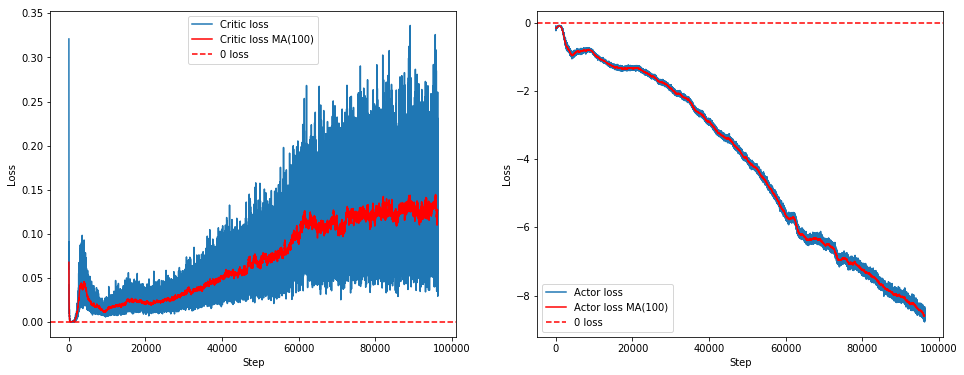

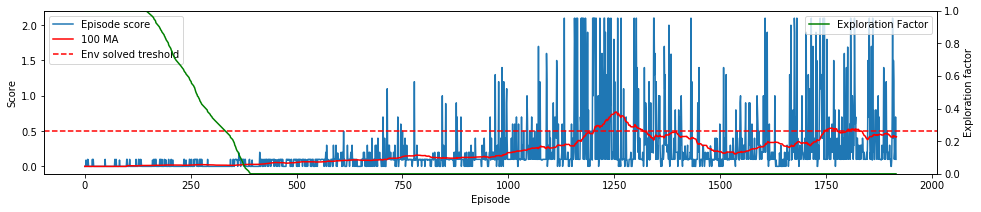

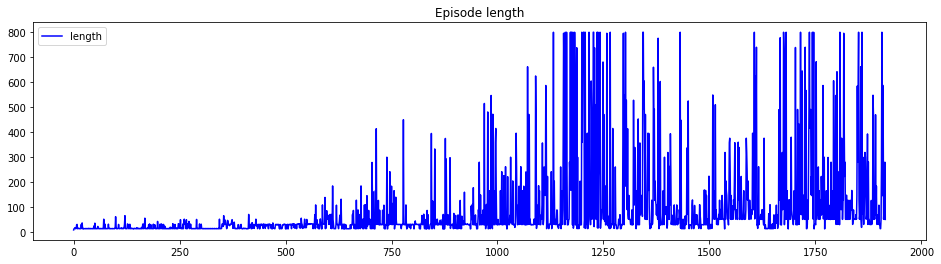

Episode:60   Scr:0.366 Mem:355294/+7951/-1883 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[233.389 207.602]-21.464]4e+01]913e+01]
Episode:80   Scr:0.377 Mem:361808/+8109/-1901 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[244.303 166.547]5.607]9]+01]5e+01]+00]
Episode:100  Scr:0.347 Mem:365706/+8197/-1921 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[271.523 217.858]3]3.378]3e+01]


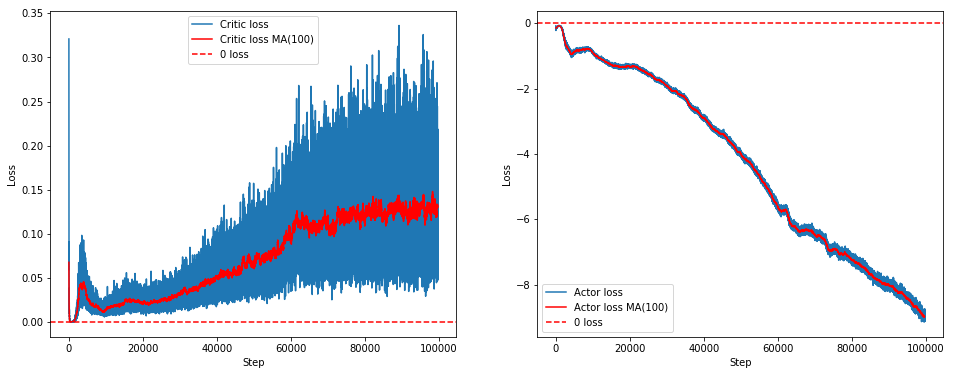

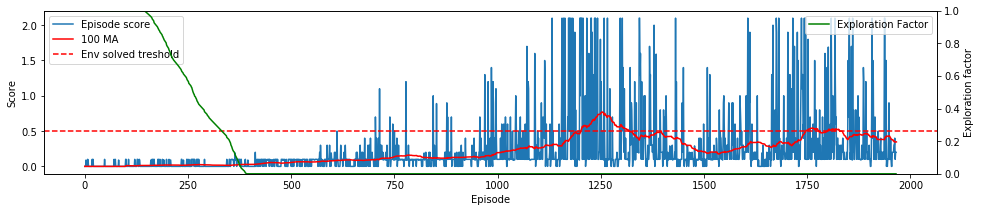

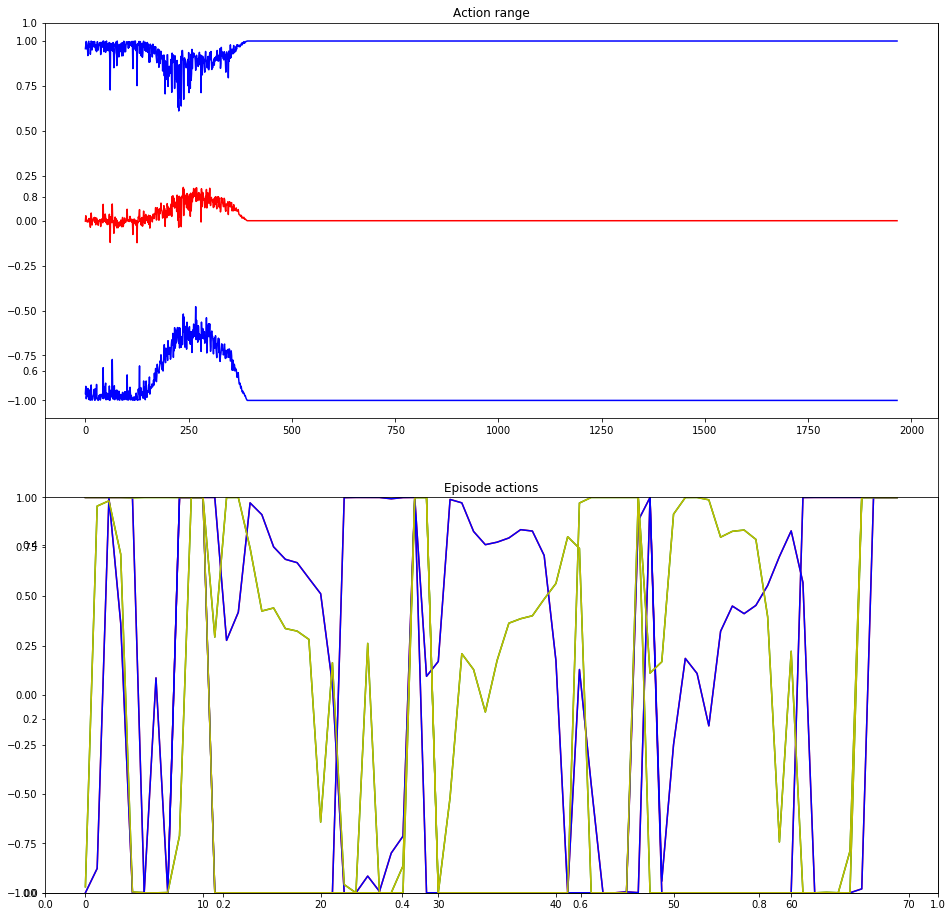

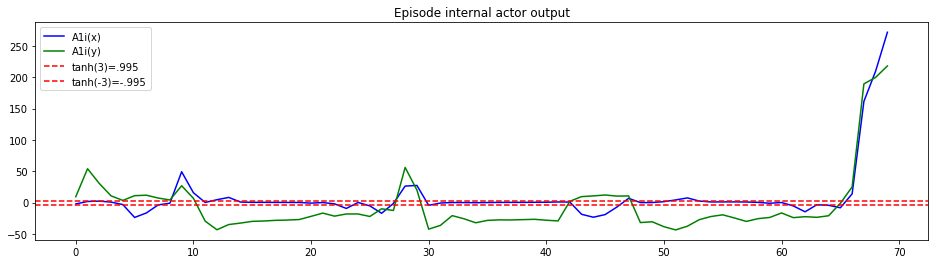

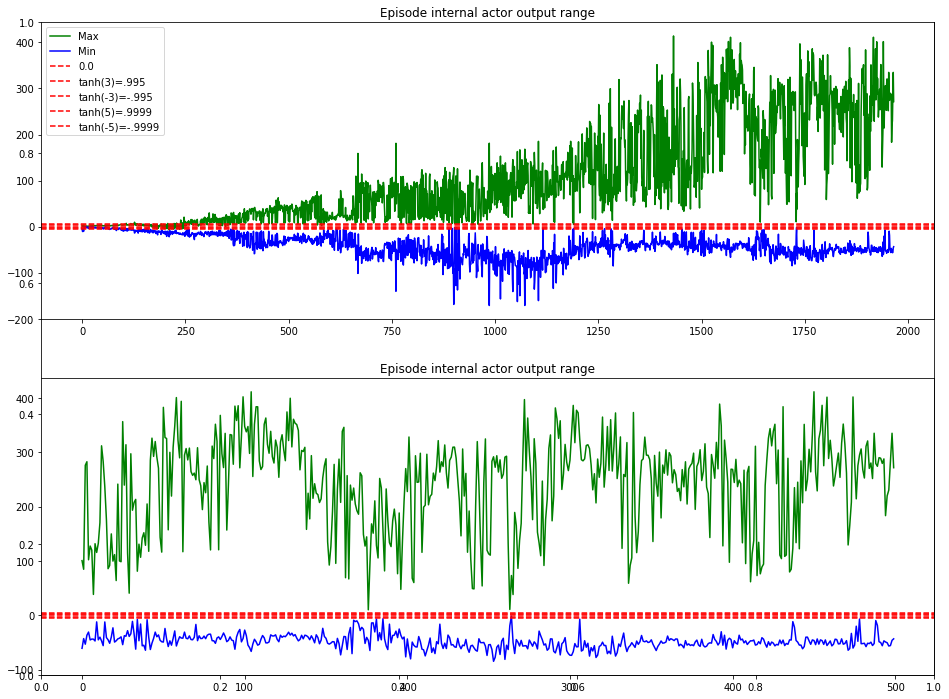

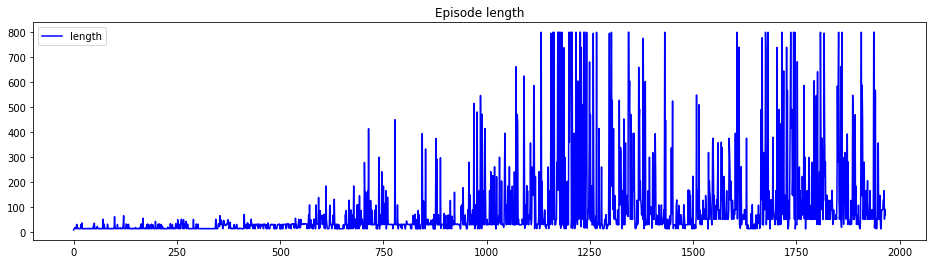

Episode:120  Scr:0.404 Mem:375394/+8437/-1939 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[186.828 194.723]3]5.486]+01]1]488e+01]
Episode:140  Scr:0.452 Mem:384040/+8651/-1957 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[357.671 265.289]5.797] ]9e+01]761e-04]
Episode:150  Scr:0.400 Mem:386020/+8696/-1967 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[356.92  257.482]1.142]4]+01]2.878e+01]

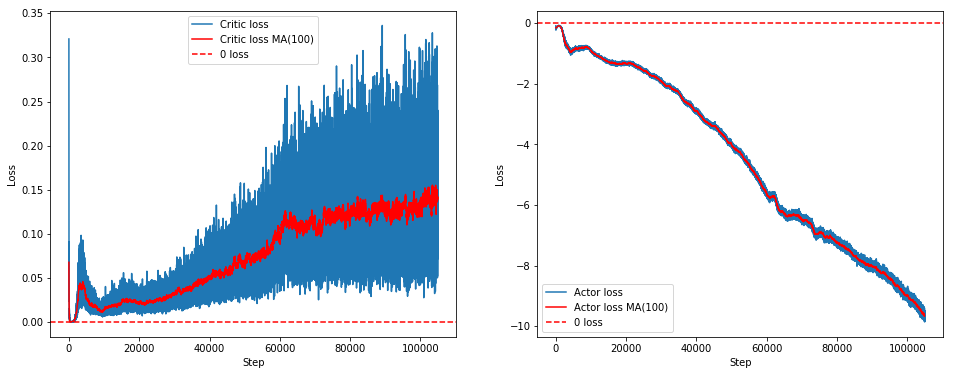

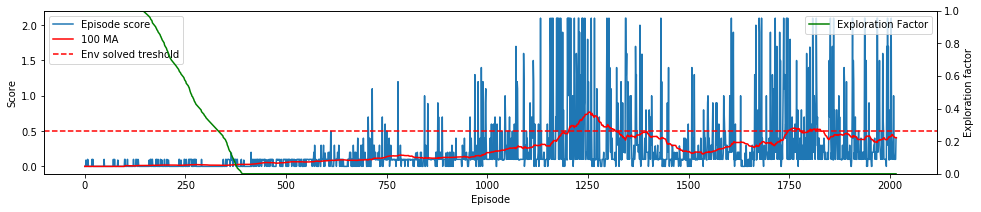

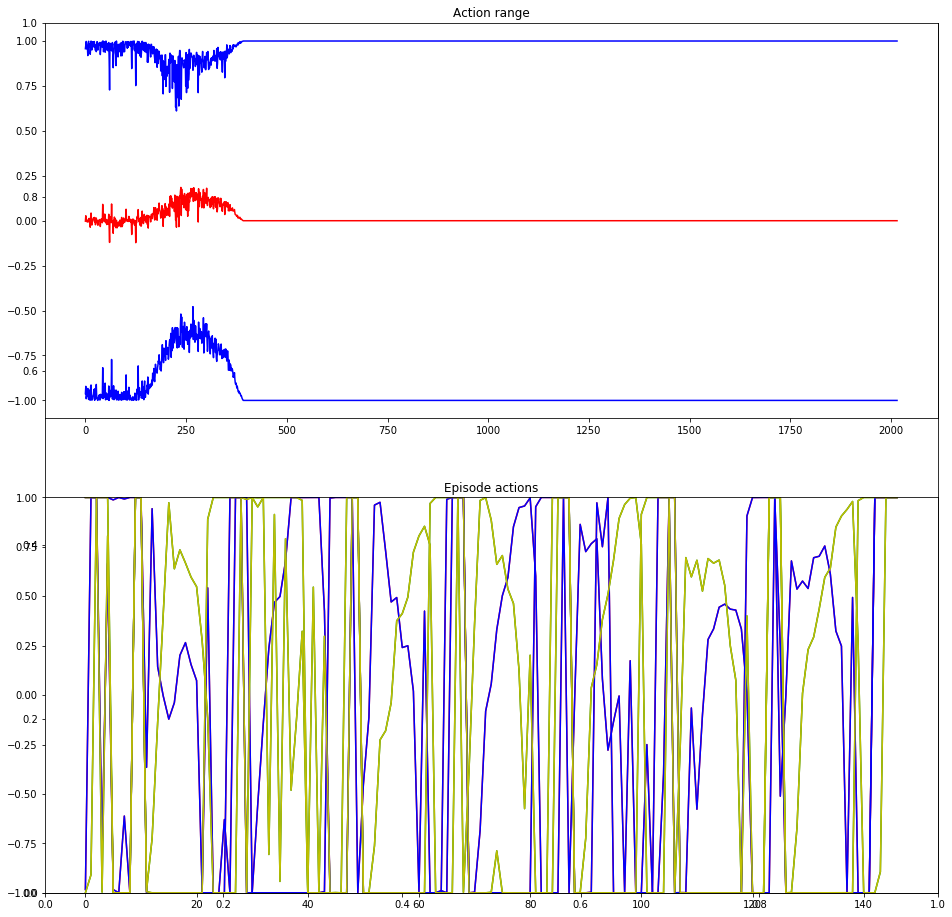

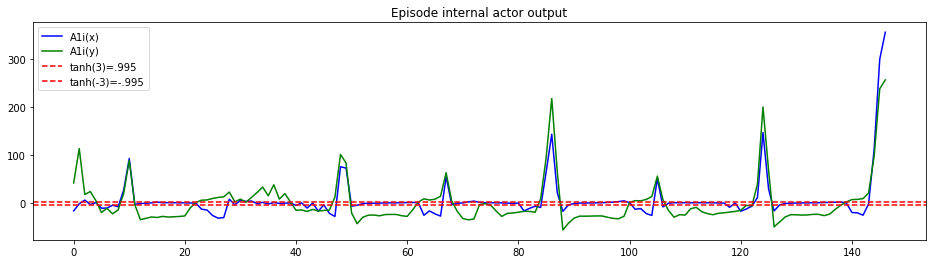

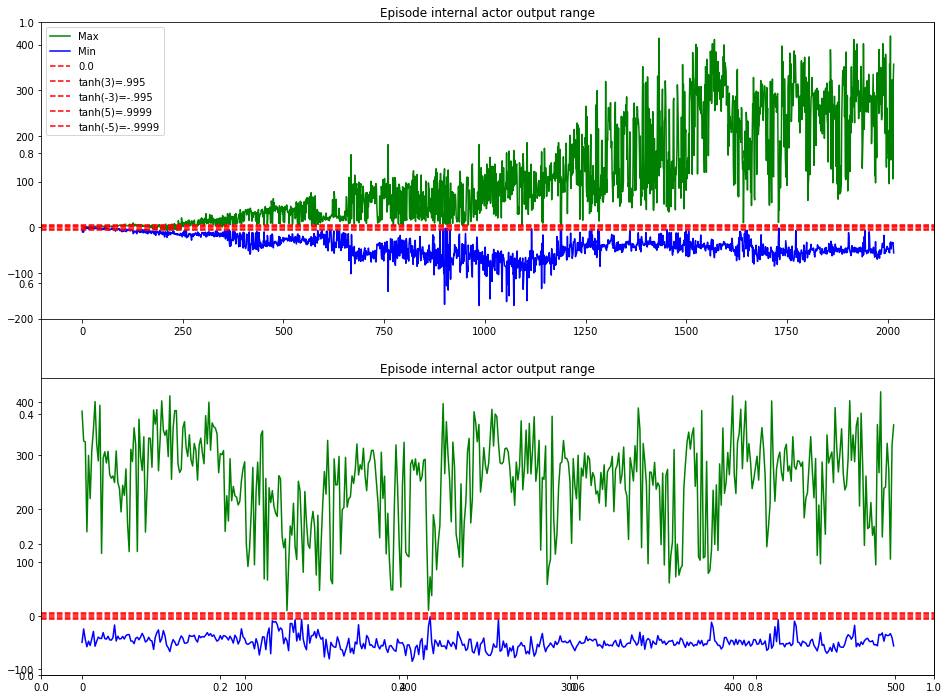

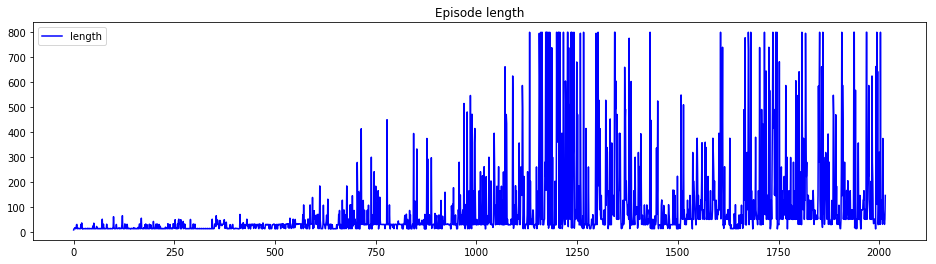

Episode:160  Scr:0.417 Mem:388656/+8758/-1977 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[261.069 212.097]3]6.1  ]0e+01]318e+00]
Episode:180  Scr:0.426 Mem:395920/+8933/-1996 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[277.27  140.866]1]0.683]04  7.293e+00]
Episode:200  Scr:0.480 Mem:403832/+9128/-2014 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[282.636 212.576]8]0.313]1]+01]529e+01]


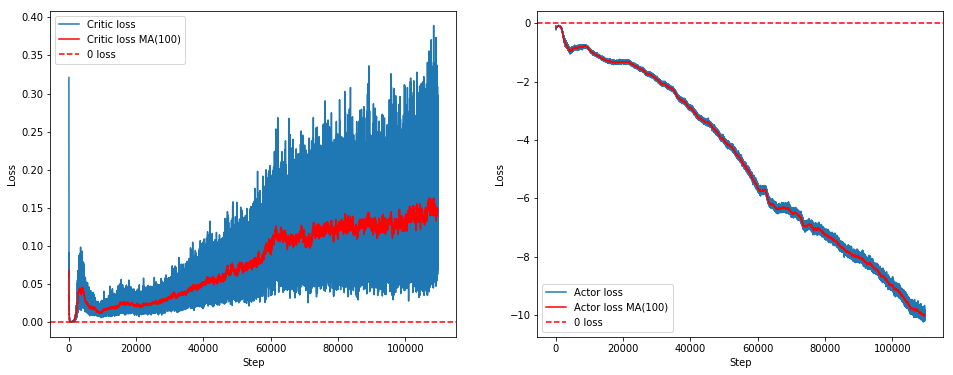

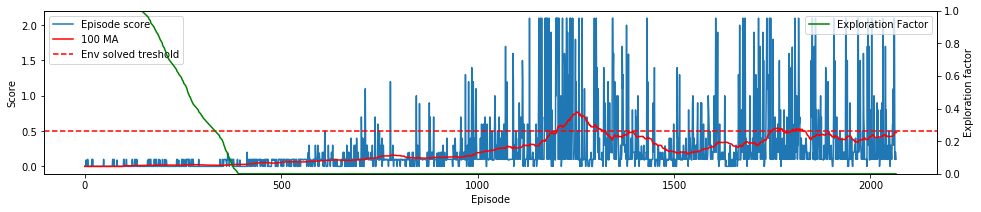

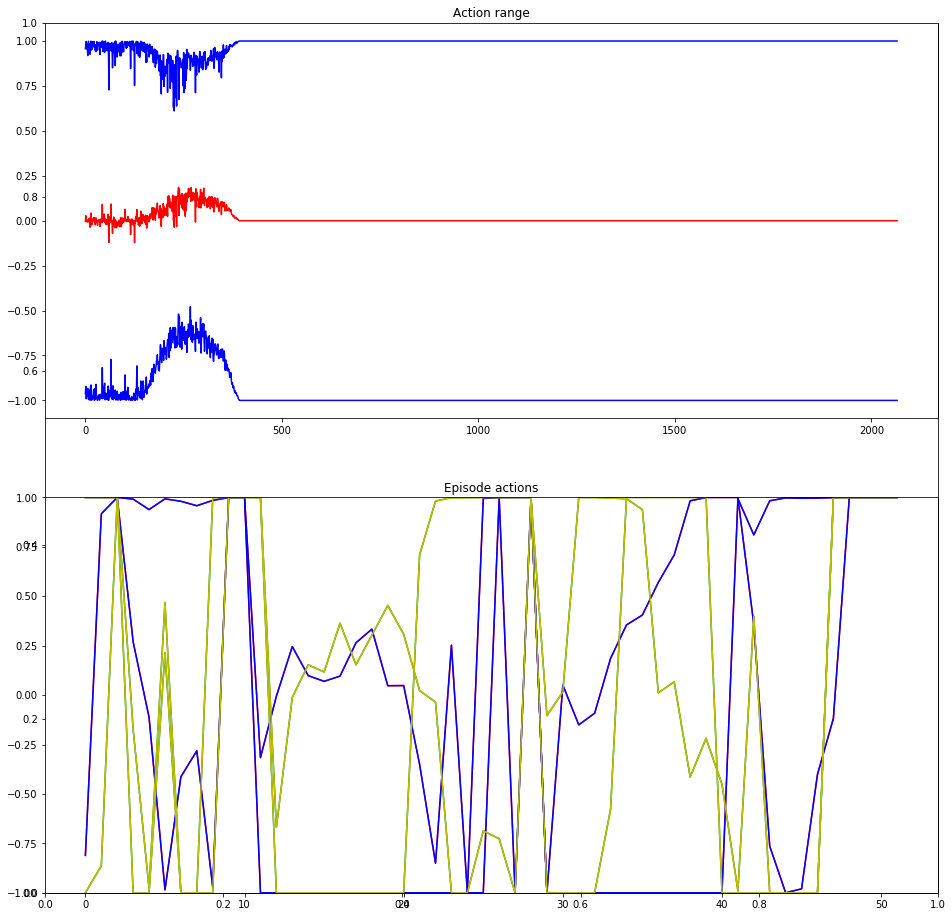

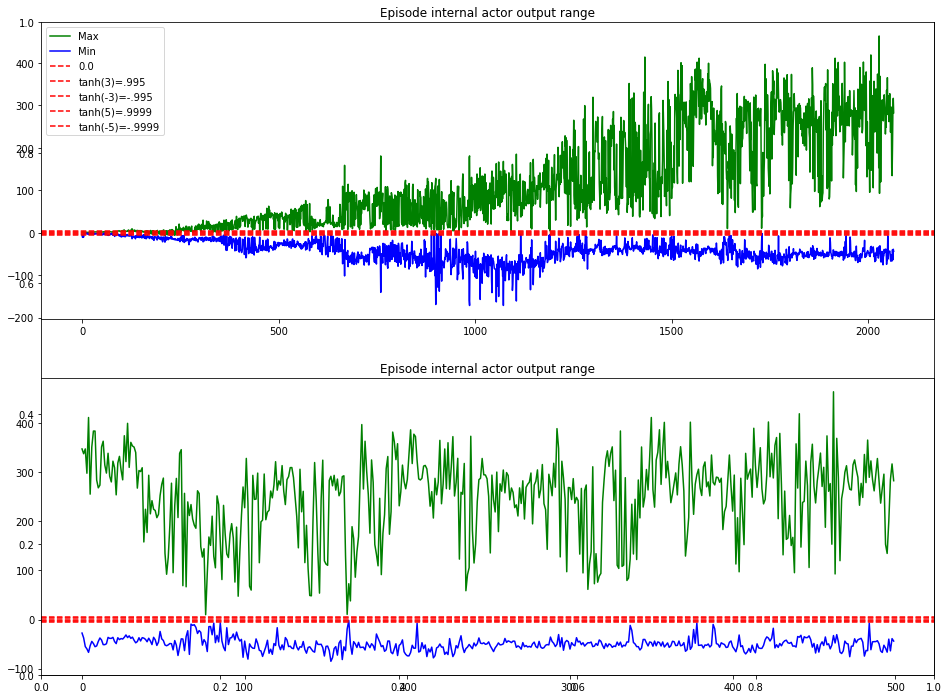

Episode:220  Scr:0.445 Mem:410734/+9295/-2033 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[194.844 118.317]897]403]3e+01]175e+01]
Episode:240  Scr:0.462 Mem:420844/+9547/-2051 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[289.68  267.824]-13.321]0e+01]045e+01]
Episode:245  Scr:1.400 Mem:425384/+9663/-2055 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[121.69  122.381]1]0.142]04 -3.984e+01]
Environment solved!
Episode:246  Scr:0.400 Mem:425678/+9670/-2056 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[330.823 234.653]3]371] ]2e+01]
Environment solved!
Episode:247  Scr:0.100 Mem:425778/+9672/-2056 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[207.817 139.226]9]178]6]
Environment solved!
Episode:248  Scr:0.100 Mem:425884/+9674/-2058 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[335.088 242.767]1]513]1]9e+01]
Environment solved!
Episode:249  Scr:0.100 Mem:425988/+9676/-2059 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[328.558 2

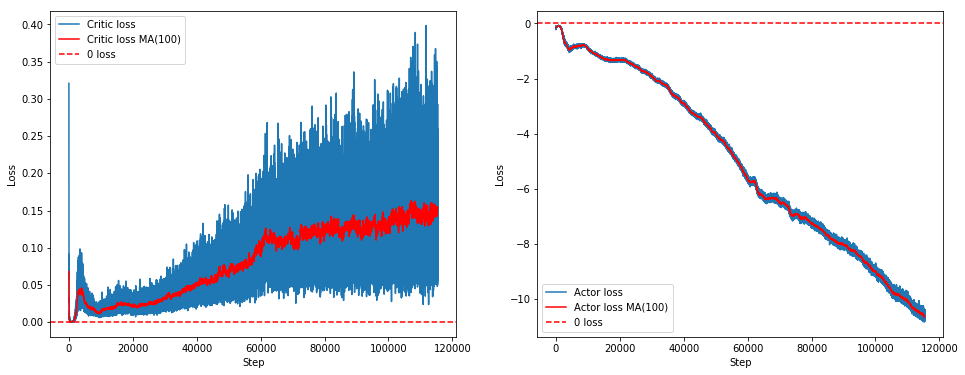

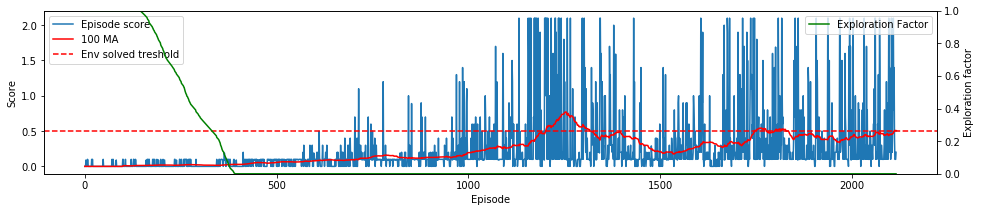

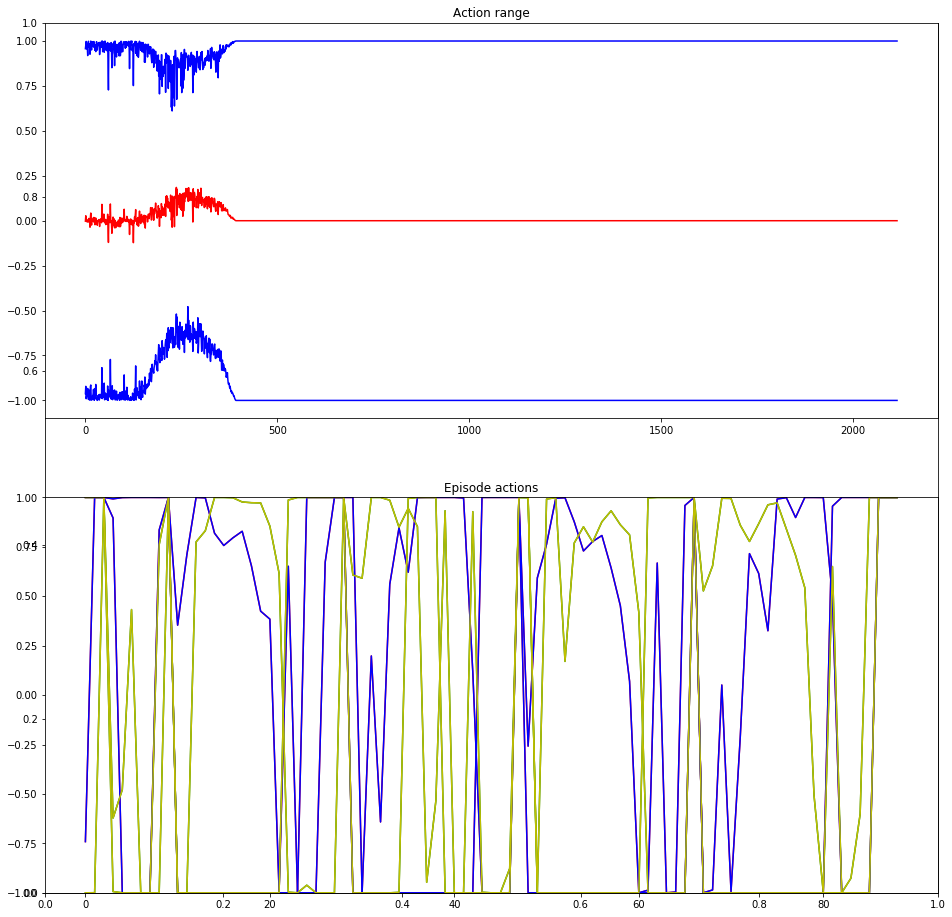

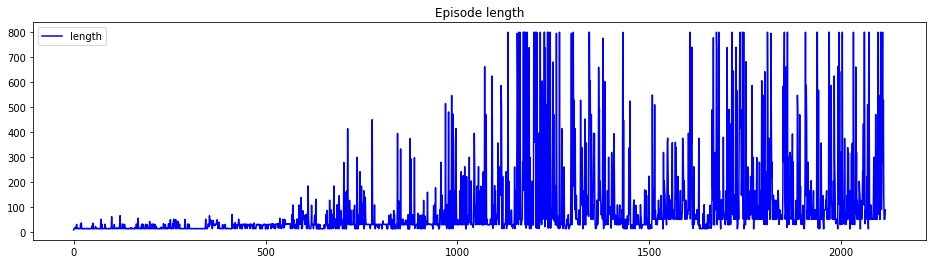


Environment solved!
Episode:251  Scr:0.100 Mem:426270/+9682/-2061 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[263.976 244.538]4.096]1]
Environment solved!
Episode:260  Scr:0.494 Mem:427730/+9714/-2070 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[305.874 225.718]3]1  ]6]9e+01]
Episode:261  Scr:1.100 Mem:428558/+9735/-2071 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[251.871 181.625]0.112]1]5e+01]
Environment solved!
Episode:263  Scr:2.100 Mem:430262/+9778/-2072 eps:0.0000 act:[+0.935,-1.000][+0.999,-1.000]<[ 0.999 -1.   ]<[  3.604 -43.822]2e+01]563e+01]
Environment solved!
Episode:264  Scr:0.500 Mem:430598/+9787/-2073 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[320.362 231.749]4] ]513]1e+01]
Environment solved!
Episode:265  Scr:0.100 Mem:430698/+9789/-2073 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[187.792 159.052]9]5]497]
Environment solved!
Episode:266  Scr:0.200 Mem:430880/+9793/-2074 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]

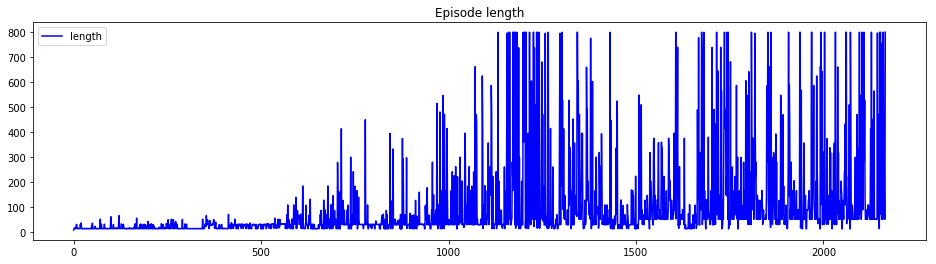


Environment solved!
Episode:301  Scr:0.800 Mem:448930/+10244/-2105 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[343.192 161.036]5]9.856]1e+01]
Environment solved!
Episode:302  Scr:0.100 Mem:449034/+10246/-2106 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[316.468 158.574]6]3.754]9e+01]
Environment solved!
Episode:303  Scr:0.100 Mem:449138/+10248/-2107 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[228.513 142.926]6]7.973]
Environment solved!
Episode:304  Scr:0.100 Mem:449198/+10249/-2108 eps:0.0000 act:[-1.000,+1.000][+1.000,+1.000]<[1. 1.]<[ 61.106 215.543]2]7.732]
Environment solved!
Episode:305  Scr:0.100 Mem:449302/+10251/-2109 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[314.971 159.576]7.543] ]2e+01]
Environment solved!
Episode:306  Scr:0.100 Mem:449362/+10252/-2110 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[52.066 26.446]3]7]3.976]
Environment solved!
Episode:307  Scr:2.100 Mem:450962/+10293/-2110 eps:0.0000 act:[+0.848,-1.000][+

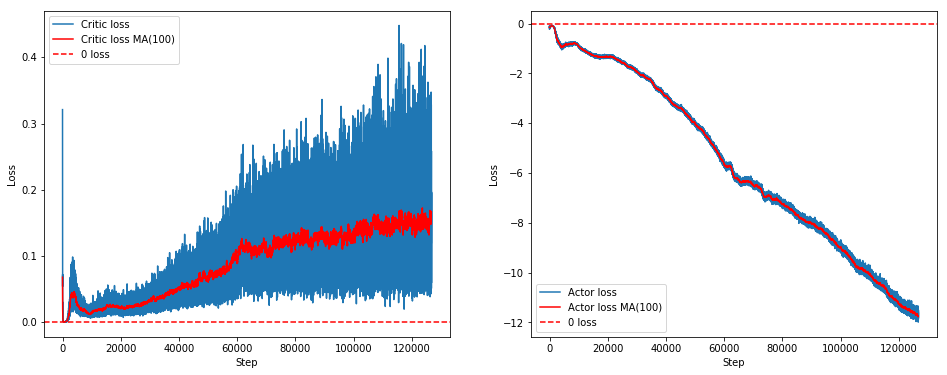

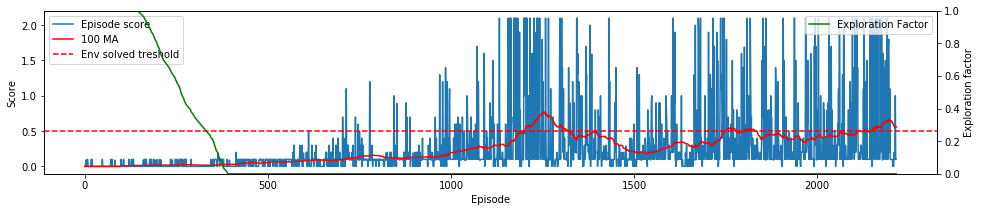

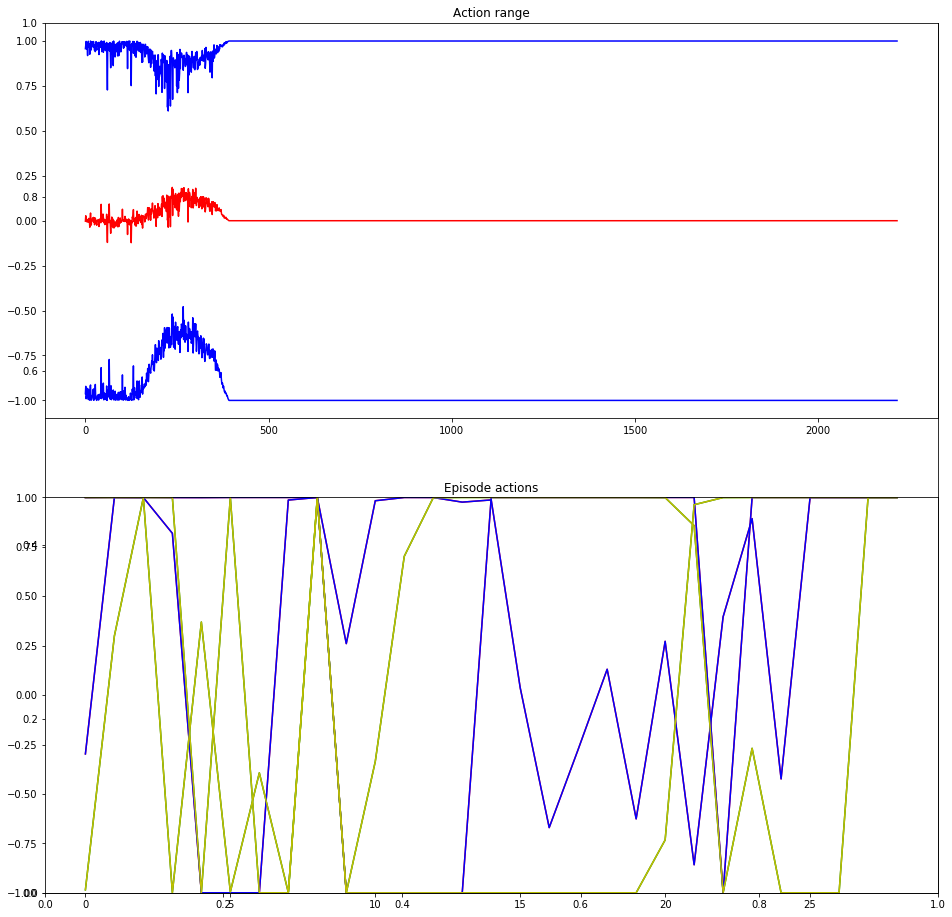

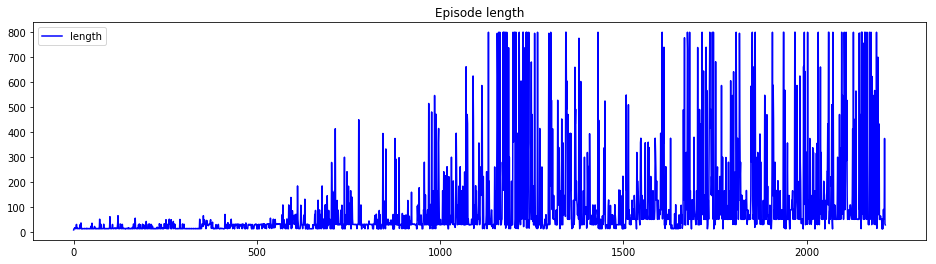


Environment solved!
Episode:351  Scr:2.000 Mem:471280/+10797/-2152 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[277.696 174.625]3]5.134]9e+01]
Environment solved!
Episode:352  Scr:0.600 Mem:471726/+10808/-2153 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[324.839 209.394]5]0.279]7e+01]
Environment solved!
Episode:353  Scr:0.100 Mem:471826/+10810/-2153 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[227.946 140.791]1.147]9]
Environment solved!
Episode:354  Scr:0.200 Mem:472008/+10814/-2155 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[303.2   164.515]5]4.897]8e+01]
Environment solved!
Episode:355  Scr:0.100 Mem:472108/+10816/-2155 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[289.922 151.66 ]4.667]1]
Environment solved!
Episode:356  Scr:2.100 Mem:473710/+10857/-2156 eps:0.0000 act:[+0.991,-1.000][+0.986,-1.000]<[ 0.986 -1.   ]<[  2.465 -42.031]5e+01]224e+00]
Environment solved!
Episode:357  Scr:0.800 Mem:474274/+10872/-2157 eps:0.0000 act:[+1

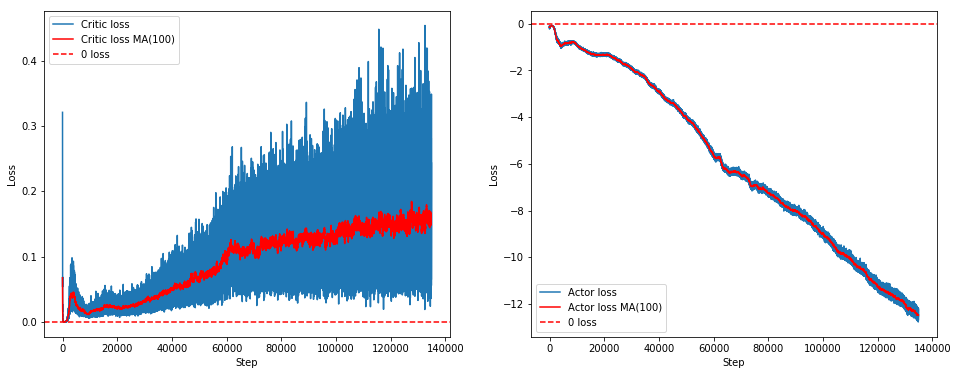

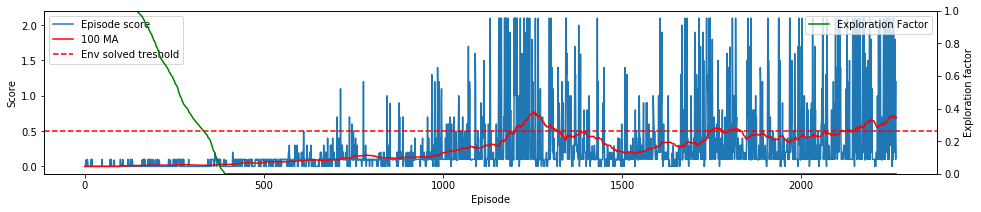

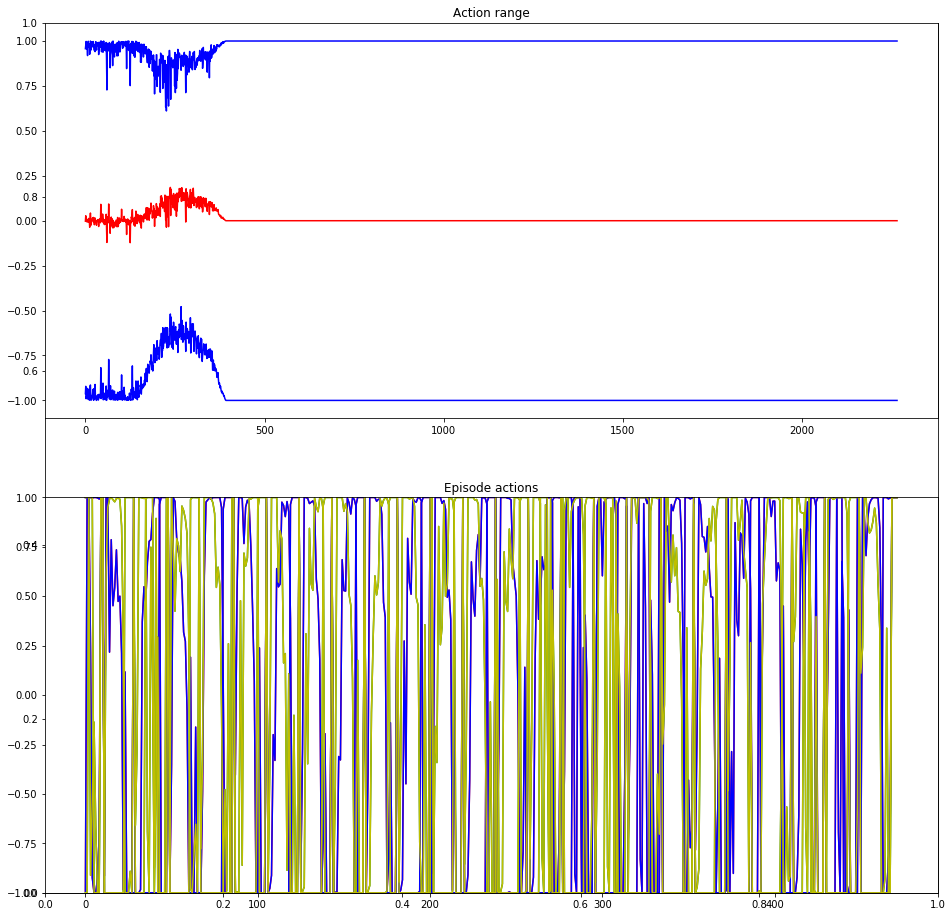

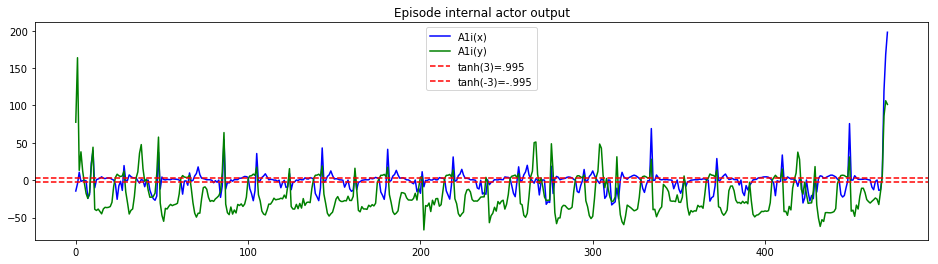

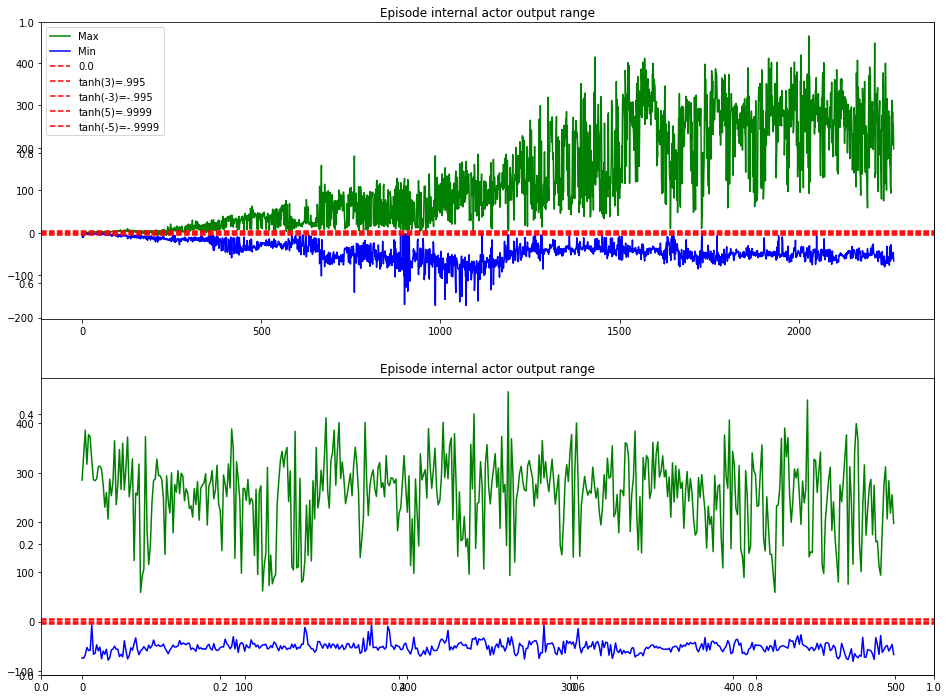

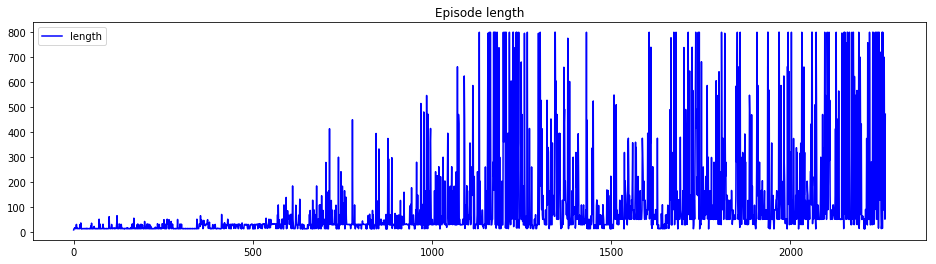


Environment solved!
Episode:401  Scr:0.500 Mem:501900/+11572/-2192 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[227.107 158.447]7.275]1]9e+01]
Environment solved!
Episode:402  Scr:0.400 Mem:502190/+11579/-2192 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[70.592 39.447]485]435]5]
Environment solved!
Episode:403  Scr:0.200 Mem:502372/+11583/-2193 eps:0.0000 act:[+1.000,+1.000][+1.000,+1.000]<[1. 1.]<[232.99  121.118]7]4.079]
Environment solved!
Episode:404  Scr:0.700 Mem:502894/+11596/-2194 eps:0.0000 act:[-0.117,-1.000][-1.000,-1.000]<[-1. -1.]<[ -7.241 -50.15 ]5.818]

KeyboardInterrupt: 

In [36]:
agent.train(True)
_ = ddpg(2000, 800)

In [ ]:
plot_run(agent)

In [ ]:
agent.train(False)

for i in range(0, 2):                                      # play game for 10 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    #state = env_info.vector_observations                   # get the current state (for each agent)
#     state = np.reshape(env_info.vector_observations, (1, num_agents * state_size))
    state = env_info.vector_observations
    
    agent.reset()
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    for t in range(100):

        actions_orig = agent.act(state, add_noise=False)
        
        
        # For agent which has concatenated state,actions, etc.
#         actions = np.reshape(actions_orig, (1, num_agents * action_size))
#         env_info = env.step(actions)[brain_name]
#         next_states = np.reshape(env_info.vector_observations, (1, num_agents * state_size, ))
#         rewards = np.reshape(env_info.rewards, (1, num_agents, ))
#         dones = np.reshape(env_info.local_done, (1, num_agents, ))
        
        actions = np.reshape(actions_orig, (num_agents, action_size))
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done

        agent.step(t, state, actions, rewards, next_states, dones)

        state = next_states
        scores += np.reshape(rewards, (num_agents, ))
        
        actions = np.reshape(actions, (num_agents, action_size))
        print("\rStep: {}, Blue: [{:+.2f}, {:+.2f}], Red: [{:+.2f}, {:+.2f}], Rewards: [{:+.2f}, {:+.2f}]".format(
            t, actions[0][0], actions[0][1], actions[1][0], actions[1][1], scores[0], scores[1]
        ), end="")

        if np.any(dones):                                  # exit loop if episode finished
            break
    print()
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

In [ ]:
env.close()